In [1]:
import spotpy
import os
import sys
import pandas as pd
import numpy as np
import subprocess
import shutil

In [2]:
sys.path.insert(1, 'd:/Projects/Tools/daycentpy_git')
# assert "dencentypy" in daycentpy.__file__


In [3]:
from daycentpy import handler
from daycentpy.models import multi_run

- Set a working directory as project folder
- provide a path to your model folder

In [4]:
pwd = "d:/Projects/Tools/DayCent-CUTE/analysis/k-fold/mt_prj"
md = "d:/Projects/Tools/DayCent-CUTE/analysis/k-fold/DayCent_data_tmp/"

In [5]:
m1 = handler.MultiInit(pwd, md)

    We found DayCent parameter base file.
    Open the file and select parameters you are goint to use ..., 
    then save it as 'seleted_pars.csv'.


In [6]:
sel_pars_df = m1.read_sel_dc_pars()

You have selected a total of 23 parameters.


In [7]:
m1.init_run()

**** Initial simulation begins ... ****


Wooster ... passed: 100%|████████████████████████████████████████████████████████████████| 5/5 [00:59<00:00, 11.88s/it]

**** Initial simulation ends ... ****


In [8]:
df = m1.all_sim_obd()
df

,somsc_sim,site_name,treat_name,time,obd
0,4681.726,SCharleston,SCharleston_NT,1992,5125.00
1,5158.380,SCharleston,SCharleston_NT,2003,4730.00
2,4178.956,SCharleston,SCharleston_CT,1992,4573.40
3,4267.893,SCharleston,SCharleston_CT,2003,4090.00
4,4344.178,SCharleston,SCharleston_MT,1992,4677.10
...,...,...,...,...,...
9,3382.937,Wooster,Wooster_cb_ct,1980,3036.05
10,3265.496,Wooster,Wooster_cb_ct,1992,2839.89
11,4533.036,Wooster,Wooster_cb_nt,1971,3714.00
12,4437.319,Wooster,Wooster_cb_nt,1980,3885.00


In [9]:
from daycentpy import modules

In [10]:
wd = os.path.join(os.getcwd(), 'multi_main')

In [11]:
os.getcwd()

'd:\\Projects\\Tools\\DayCent-CUTE\\analysis\\k-fold\\mt_prj'

In [12]:
obs_m = df.obd.tolist()

In [13]:
from spotpy.likelihoods import gaussianLikelihoodMeasErrorOut as GausianLike

Initializing the  DiffeRential Evolution Adaptive Metropolis (DREAM) algorithm  with  100  repetitions
The objective function will be maximized
Starting the DREAM algotrithm with 100 repetitions...
Initialize  10  chain(s)...
1 of 100, maximal objective function=-716.304, time remaining: 01:00:22
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Beginn of Random Walk
11 of 100, maximal objective function=-648.469, time remaining: 00:18:08
21 of 100, maximal objective function=-636.251, time remaining: 00:13:13
Acceptance rates [%] =100.  50. 100. 100. 100.  50.  50. 100. 100.  50.
Convergence rates =1.6226 2.0339 1.9714 1.8937 2.3091 1.6294 5.4114 4.7867 3.4596 3.4496
 4.2723 4.2028 2.4227 2.4225 2.4245 1.7715 2.651  2.7834 3.297  1.679
 1.9669 1.5891 2.7343
31 of 100, maximal objective function=-636.251, time remaining: 00:10:33
Acceptance rates [%] =100.    33.33 100.    66.67 100.    66.67  33.33  66.67  66.67  33.33
Convergence rates =3.348  4.3261 4.2218 2.2

C:\Users\seonggyu.park\Miniconda3\envs\daycentpy\Lib\site-packages\spotpy\algorithms\dream.py:239: RuntimeWarning: invalid value encountered in sqrt
  R_stat = np.sqrt(


41 of 100, maximal objective function=-636.251, time remaining: 00:08:32
Acceptance rates [%] = 75.  25.  75.  75. 100.  50.  25.  50.  75.  50.
Convergence rates =3.0518 2.1542 2.3147 2.6788 3.2757 2.6069 3.9248 2.7383 2.7631 3.5367
 2.1381 2.3761 2.9136 2.3563 2.9137 3.235  2.2623 2.2788 3.0561 2.7367
 2.3807 3.3762 3.1317
51 of 100, maximal objective function=-634.034, time remaining: 00:06:51
Acceptance rates [%] =80. 20. 60. 60. 80. 60. 40. 40. 60. 60.
Convergence rates =3.2123 2.2865 2.6584 7.0272 2.7851 2.8715 3.8849 2.6588 5.1009 2.4813
 1.8934 2.9984 3.084  3.6588 2.486  2.669  2.0485 2.1721 3.0065 7.1958
 2.5011 2.2089 2.6835
61 of 100, maximal objective function=-634.034, time remaining: 00:05:19
Acceptance rates [%] =66.67 33.33 66.67 50.   66.67 50.   33.33 33.33 50.   50.  
Convergence rates =3.4123 2.577  2.832  8.07   2.8587 3.124  4.4552 3.0322 5.9548 2.3127
 1.8367 3.3937 2.6703 4.2794 2.7036 2.9014 2.1827 2.4432 3.4283 6.5621
 2.8901 2.2067 2.8989
71 of 100, maximal 

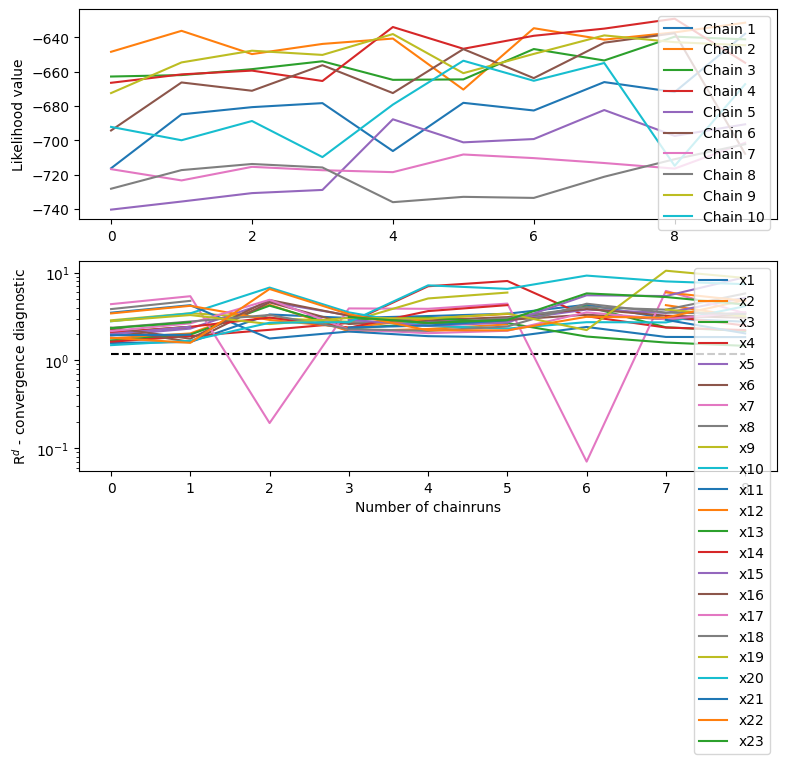

In [14]:
modules.multi_run_dream(wd, obs_m, sel_pars_df, 100, dbformat="ram", nChains=10, parallel="mpc", obj_func=GausianLike)

In [44]:



sim_df = pd.DataFrame()
for i in range(mlines[0]):
    # start_yr, end_yr = self.get_start_end_years(data[i][1])
    outf = data[i][1]+".lis"
    df = pd.read_csv( outf, sep=r'\s+', skiprows=1)
    cali_start = 1971
    cali_end = 2003
    # daycent time shift
    cali_sshift = cali_start + .08
    cali_eshift = cali_end + 1.00
    df_sel = df.loc[(df['time']>=cali_sshift) & (df['time']<=cali_eshift)]
    df_sel.index = pd.date_range(start='1/1/{}'.format(cali_start), periods=len(df_sel), freq='M')
    dfa = df_sel.loc[:, ['somsc']].resample('A').mean()
    dfa['site_name'] = 'sidney'
    dfa['treat_name'] = data[i][1]
    dfa['time'] = dfa.index.year
    dfa.rename(columns = {'somsc':'somsc_sim'}, inplace = True)
    sim_df = pd.concat([sim_df, dfa], axis=0)

# get all obds
obd_f = "soc_obd.csv"
obd_df = pd.read_csv(obd_f) 
obd_df.replace(-999, np.nan, inplace=True)



for i in range(len(sim_df)):
    tn = sim_df.treat_name[i]
    tm = sim_df.time[i]
    if obd_df[tn].loc[obd_df['Year']==tm].size > 0:
        sim_df.loc[(sim_df["treat_name"]==tn) & (sim_df["time"]==tm), 'obd'] = obd_df[tn].loc[obd_df['Year']==tm].values[0] 
sim_df = sim_df.dropna(axis=0)
sim_df.to_csv("sim_obd.csv", index=False, float_format='%.3f')



# for i in range(len(sim_df)):
#     tn = sim_df.treat_name[i]
#     tm = sim_df.time[i]
#     sim_df.loc[(sim_df["treat_name"]==tn) & (sim_df["time"]==tm), 'obd'] = obd_df[tn].loc[obd_df['Year']==tm].values[0] 
# sim_df = sim_df.dropna(axis=0)
# sim_df.to_csv("sim_obd.csv", index=False, float_format='%.3f')

In [43]:
if obd_df["SCharleston_CT"].loc[obd_df["Year"]==1972].size >0:
    print('hi')
else:
    print('noe')

noe


In [37]:
if obd_df["SCharleston_CT"].loc[obd_df["Year"]==1972].values:
    print('test')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [32]:
if obd_df["SCharleston_CT"].loc[obd_df["Year"]==1972]:
    print('nope')
else:
    print('yes')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [27]:
 obd_df[tn].loc[obd_df['Year']==tm]

,somsc_sim,site_name,treat_name,time,obd
1971-12-31,3651.877250,sidney,SCharleston_NT,1971,3729.4
1972-12-31,3730.965833,sidney,SCharleston_NT,1972,NaN
1973-12-31,3770.341417,sidney,SCharleston_NT,1973,NaN
1974-12-31,3802.381167,sidney,SCharleston_NT,1974,NaN
1975-12-31,3839.693417,sidney,SCharleston_NT,1975,NaN
...,...,...,...,...,...
1999-12-31,4420.448500,sidney,SCharleston_MT,1999,NaN
2000-12-31,4432.014500,sidney,SCharleston_MT,2000,NaN
2001-12-31,4436.691167,sidney,SCharleston_MT,2001,NaN
2002-12-31,4449.835333,sidney,SCharleston_MT,2002,NaN


In [26]:
obd_df

,Year,SCharleston_CT,SCharleston_MT,SCharleston_NT
0,1971,3520.6,3625.0,3729.4
1,1992,4573.4,4677.1,5125.0
2,2003,4090.0,4120.0,4730.0


In [25]:
obd_f

'soc_obd.csv'

In [90]:
sim_df.loc[(sim_df["treat_name"]=='Sidney_BF') & (sim_df["time"]==1993), 'obd'] = obd_df['Sidney_BF'].loc[obd_df['Year']==1993].values[0]

In [82]:
obd_df['Sidney_BF'].loc[obd_df['Year']==1993].values[0]

3920

In [28]:
nam_ex

7

In [91]:
sim_df

,somsc_sim,site_name,treat_name,time,obd
1993-12-31,3940.352917,sidney,Sidney_BF,1993,3920.0
1993-12-31,4785.250083,sidney,Sidney_NT,1993,NaN
1993-12-31,4582.889000,sidney,Sidney_SM,1993,NaN


In [78]:
sim_df.loc[(sim_df["treat_name"]=='Sidney_BF') & (sim_df["time"]==1993), 'obd'] = 1

In [79]:
sim_df

,somsc_sim,site_name,treat_name,time,obd
1993-12-31,3940.352917,sidney,Sidney_BF,1993,1.0
1993-12-31,4785.250083,sidney,Sidney_NT,1993,NaN
1993-12-31,4582.889000,sidney,Sidney_SM,1993,NaN


In [14]:
dc_handler.run_dream(wd, sel_pars_df, "mpc", 2000, 20)

Initializing the  Shuffled Complex Evolution (SCE-UA) algorithm  with  2000  repetitions
The objective function will be minimized
Starting burn-in sampling...


PermissionError: [Errno 13] Permission denied: 'd:\\Projects\\Tools\\DayCent-CUTE\\analysis\\cali\\main\\db_results.csv'

In [14]:
dc_handler.demo_cali(wd, sel_pars_df)

Initializing the  DiffeRential Evolution Adaptive Metropolis (DREAM) algorithm  with  2000  repetitions
The objective function will be minimized
Starting the DREAM algotrithm with 2000 repetitions...
Initialize  10  chain(s)...
simulation
14
evaluation
14
1 of 2000, minimal objective function=8.18172, time remaining: 05:41:57
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
* Database file 'DREAM_dc_bias.csv' created.
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Beginn of Random Walk
simulation
14
evaluation
14
11 of 2000, minimal objective function=0.139615, time remaining: 01:53:15
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation

simulation
14
evaluation
14
131 of 2000, minimal objective function=0.139615, time remaining: 01:00:03
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =69.23 61.54 61.54 53.85 61.54 46.15 84.62 53.85 53.85 46.15
Convergence rates =2.9486 3.1087 3.4372 2.3353 1.738  2.8077 2.7371 4.3033 3.9865 1.5872
 3.3448 4.1023 3.8731 4.3084 3.1332 1.9227 2.8955 2.9243 2.4874 2.6624
 3.423  1.6196 2.7567 4.1034 2.1152 1.9055 1.7314 2.3572 1.9118
simulation
14
evaluation
14
141 of 2000, minimal objective function=0.139615, time remaining: 00:59:18
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
1

simulation
14
evaluation
14
261 of 2000, minimal objective function=0.139615, time remaining: 00:53:05
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =65.38 65.38 53.85 42.31 65.38 53.85 57.69 50.   50.   53.85
Convergence rates =2.1558 3.1176 1.7703 2.8741 2.938  2.2465 1.6791 1.8805 1.7132 2.1772
 2.3042 1.7036 2.4431 1.9018 1.723  3.1809 2.1915 1.635  1.9056 2.7907
 1.6687 2.4065 1.5282 2.7229 1.5063 2.2991 2.5181 4.2086 2.6128
simulation
14
evaluation
14
271 of 2000, minimal objective function=0.139615, time remaining: 00:52:39
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
1

simulation
14
evaluation
14
391 of 2000, minimal objective function=0.139615, time remaining: 00:48:10
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =64.1  69.23 51.28 46.15 64.1  58.97 53.85 53.85 58.97 51.28
Convergence rates =1.7664 1.7052 1.7813 2.0786 2.2354 1.6836 2.0491 1.5892 1.3555 1.8669
 1.5849 1.9225 2.1253 2.2091 1.626  1.974  1.692  1.4132 1.7016 1.6035
 1.4504 1.6426 1.4752 2.2317 1.7201 1.6283 2.0995 1.6157 1.4632
simulation
14
evaluation
14
401 of 2000, minimal objective function=0.139615, time remaining: 00:47:50
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
1

simulation
14
evaluation
14
521 of 2000, minimal objective function=0.139615, time remaining: 00:43:48
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =63.46 61.54 57.69 48.08 59.62 61.54 50.   59.62 61.54 50.  
Convergence rates =1.9245 1.6796 1.9377 2.1747 1.9774 1.7312 1.4699 1.5827 1.4017 1.474
 1.433  1.9213 2.0407 1.7827 1.5881 1.6956 1.4952 1.4143 1.5209 1.3335
 1.4947 1.2969 1.3822 1.6656 1.738  1.7024 1.8682 1.8064 1.6838
simulation
14
evaluation
14
531 of 2000, minimal objective function=0.139615, time remaining: 00:43:29
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14

simulation
14
evaluation
14
651 of 2000, minimal objective function=0.139615, time remaining: 00:39:41
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =63.08 60.   58.46 50.77 58.46 55.38 53.85 58.46 58.46 53.85
Convergence rates =1.5957 1.4273 1.4991 1.6614 1.5899 1.9896 1.4955 1.4934 1.8427 1.2982
 1.4337 1.5168 1.8716 1.3908 1.5708 1.6205 1.4653 1.2438 1.4787 1.3134
 1.6537 1.3353 1.7493 1.4717 1.3896 1.555  1.6151 1.6369 1.7963
simulation
14
evaluation
14
661 of 2000, minimal objective function=0.139615, time remaining: 00:39:22
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
1

simulation
14
evaluation
14
781 of 2000, minimal objective function=0.139615, time remaining: 00:35:42
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =61.54 65.38 60.26 55.13 60.26 52.56 57.69 61.54 60.26 55.13
Convergence rates =1.4226 1.4553 1.3226 1.5029 1.3791 1.5684 1.5173 1.5084 1.7694 1.3013
 1.4084 1.3197 1.7452 1.2987 1.6831 1.3229 1.3994 1.3421 1.6441 1.2341
 1.8554 1.4675 1.4945 1.3139 1.289  1.706  1.4302 1.3693 1.3802
simulation
14
evaluation
14
791 of 2000, minimal objective function=0.139615, time remaining: 00:35:24
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
1

simulation
14
evaluation
14
911 of 2000, minimal objective function=0.139615, time remaining: 00:31:48
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =67.03 65.93 54.95 54.95 62.64 52.75 61.54 63.74 63.74 54.95
Convergence rates =1.2466 1.3867 1.2841 1.43   1.2782 1.2895 1.4818 1.3853 1.4514 1.3829
 1.391  1.1684 1.6021 1.2257 1.3491 1.3561 1.4183 1.4479 1.5953 1.18
 1.7837 1.5443 1.2069 1.3553 1.3229 1.7634 1.36   1.3556 1.331 
simulation
14
evaluation
14
921 of 2000, minimal objective function=0.139615, time remaining: 00:31:30
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14


simulation
14
evaluation
14
1041 of 2000, minimal objective function=0.139615, time remaining: 00:27:56
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =66.35 65.38 53.85 58.65 64.42 54.81 60.58 64.42 62.5  58.65
Convergence rates =1.1296 1.2307 1.3498 1.2221 1.2414 1.2341 1.2941 1.3486 1.3407 1.453
 1.1387 1.1482 1.5128 1.3104 1.2025 1.4109 1.3445 1.502  1.4177 1.1585
 1.4746 1.3744 1.1316 1.3057 1.2882 1.7636 1.3012 1.3539 1.3963
simulation
14
evaluation
14
1051 of 2000, minimal objective function=0.139615, time remaining: 00:27:39
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation


simulation
14
evaluation
14
1171 of 2000, minimal objective function=0.139615, time remaining: 00:24:06
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =65.81 63.25 55.56 58.97 64.1  52.99 62.39 58.97 59.83 56.41
Convergence rates =1.1106 1.1901 1.4571 1.1751 1.2128 1.3343 1.2383 1.237  1.227  1.3397
 1.133  1.1475 1.4794 1.4594 1.1913 1.3154 1.1279 1.2246 1.4303 1.1743
 1.2672 1.1909 1.1859 1.216  1.3078 1.6175 1.3391 1.3794 1.31  
simulation
14
evaluation
14
1181 of 2000, minimal objective function=0.139615, time remaining: 00:23:48
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation

simulation
14
evaluation
14
1301 of 2000, minimal objective function=0.139615, time remaining: 00:20:18
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =65.38 63.85 56.15 59.23 63.85 52.31 61.54 53.85 60.   54.62
Convergence rates =1.0931 1.2356 1.4724 1.2792 1.2153 1.3331 1.2298 1.2212 1.2196 1.2494
 1.1319 1.1532 1.3511 1.5336 1.1623 1.1789 1.0593 1.2264 1.5181 1.226
 1.1964 1.1137 1.1663 1.2157 1.1843 1.5204 1.3664 1.3867 1.263 
simulation
14
evaluation
14
1311 of 2000, minimal objective function=0.139615, time remaining: 00:20:01
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation


simulation
14
evaluation
14
1431 of 2000, minimal objective function=0.139615, time remaining: 00:16:30
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =65.03 63.64 51.05 58.74 62.24 55.24 61.54 50.35 59.44 53.15
Convergence rates =1.1049 1.3914 1.464  1.3394 1.282  1.2982 1.2829 1.2034 1.2045 1.2389
 1.1833 1.1944 1.2691 1.5753 1.1104 1.1712 1.0524 1.2487 1.49   1.3274
 1.2435 1.0775 1.1718 1.2664 1.0646 1.4729 1.4099 1.492  1.2765
simulation
14
evaluation
14
1441 of 2000, minimal objective function=0.139615, time remaining: 00:16:13
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation

simulation
14
evaluation
14
1561 of 2000, minimal objective function=0.139615, time remaining: 00:12:43
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =65.38 63.46 48.08 58.97 61.54 53.85 61.54 51.28 58.97 53.21
Convergence rates =1.1493 1.4581 1.4426 1.3773 1.4279 1.2986 1.3487 1.1988 1.1588 1.1698
 1.212  1.197  1.1991 1.5314 1.1091 1.1992 1.0767 1.2497 1.4473 1.3221
 1.3099 1.0719 1.1958 1.226  1.0398 1.4185 1.4078 1.5103 1.2197
simulation
14
evaluation
14
1571 of 2000, minimal objective function=0.139615, time remaining: 00:12:25
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation

simulation
14
evaluation
14
1691 of 2000, minimal objective function=0.139615, time remaining: 00:08:56
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =63.31 63.31 46.15 59.17 62.13 52.07 59.76 49.7  60.36 55.62
Convergence rates =1.2108 1.4733 1.3063 1.3953 1.4281 1.2218 1.2424 1.1957 1.1725 1.1287
 1.192  1.2613 1.1698 1.4802 1.1121 1.2185 1.1008 1.2796 1.4326 1.3368
 1.3421 1.1076 1.1909 1.2012 1.0552 1.3505 1.4492 1.5671 1.2109
simulation
14
evaluation
14
1701 of 2000, minimal objective function=0.139615, time remaining: 00:08:39
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation

simulation
14
evaluation
14
1821 of 2000, minimal objective function=0.139615, time remaining: 00:05:10
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =62.09 63.74 45.05 58.79 62.09 52.2  58.24 46.7  59.34 53.85
Convergence rates =1.2763 1.4538 1.25   1.4631 1.4424 1.1395 1.144  1.238  1.1688 1.1258
 1.171  1.2963 1.2206 1.4845 1.1528 1.2308 1.1536 1.296  1.3894 1.3791
 1.3737 1.1489 1.2414 1.2099 1.062  1.3042 1.4183 1.4213 1.2748
simulation
14
evaluation
14
1831 of 2000, minimal objective function=0.139615, time remaining: 00:04:52
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation

simulation
14
evaluation
14
1951 of 2000, minimal objective function=0.139615, time remaining: 00:01:24
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
Acceptance rates [%] =62.05 64.62 47.18 58.46 60.   52.82 58.46 46.67 61.54 53.85
Convergence rates =1.2716 1.3953 1.2208 1.5051 1.4935 1.0908 1.1022 1.2942 1.1637 1.1731
 1.1263 1.3417 1.231  1.5264 1.1966 1.2209 1.2296 1.3195 1.3503 1.3453
 1.4103 1.1689 1.2263 1.2347 1.0921 1.29   1.3758 1.3367 1.2964
simulation
14
evaluation
14
1961 of 2000, minimal objective function=0.139615, time remaining: 00:01:06
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation
14
evaluation
14
simulation